그룹 연산
- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
- 그룹 객체 만들기(분항)
- 그룹 연산 메소드(적용, 결합)

In [2]:
import pandas as pd
import seaborn as sns

dt = sns.load_dataset('titanic')
df = dt.loc[:,['age','sex','class','fare','survived']]
print('승객 수:',len(df))
print(df.head())

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [3]:
df.value_counts('class')


class
Third     491
First     216
Second    184
dtype: int64

In [6]:
grouped = df.groupby(['class'])
# list(grouped)
for key, group in grouped:
    print('* key: ', key)
    print('* number: ', len(group))
    print(group.head())

* key:  First
* number:  216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key:  Second
* number:  184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key:  Third
* number:  491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [7]:
average = grouped.mean()
average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [11]:
grouped.max()

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [34]:
# Q. 'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요 (describe())
group3 = list(grouped)[2][1]
print(group3,type(group3))
group3.describe()

      age     sex  class     fare  survived
0    22.0    male  Third   7.2500         0
2    26.0  female  Third   7.9250         1
4    35.0    male  Third   8.0500         0
5     NaN    male  Third   8.4583         0
7     2.0    male  Third  21.0750         0
..    ...     ...    ...      ...       ...
882  22.0  female  Third  10.5167         0
884  25.0    male  Third   7.0500         0
885  39.0  female  Third  29.1250         0
888   NaN  female  Third  23.4500         0
890  32.0    male  Third   7.7500         0

[491 rows x 5 columns] <class 'pandas.core.frame.DataFrame'>


,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [24]:
group3 = grouped.get_group('Third')
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [40]:
# class 열, sex열을 기준으로 분할하여 grouped_two에 저장
grouped_two = df.groupby(['class','sex'])
for key,group in grouped_two:
    print('* key: ', key)
    print('* number: ', len(group))
    print(group.head())
# grouped_two.describe()

* key:  ('First', 'female')
* number:  94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
* key:  ('First', 'male')
* number:  122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
* key:  ('Second', 'female')
* number:  76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1
* key:  ('Second', 'male')
* number:  108
     age   sex   class  fare  survived
17   NaN  mal

age                                                         \
               count       mean        std   min     25%   50%    75%   max   
class  sex                                                                    
First  female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0   
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0   
Second female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0   
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0   
Third  female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0   
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0   

                fare              ...                       survived  \
               count        mean  ...         75%       max    count   
class  sex                        ...                                  
First  female   94.0  106.125798  ...  134.500000  512.3292     94.0   
       male    122.0   67.226127  ...   78.459375  512.3292    122.0   
Second female   76.0   21.970121  ...   26.062500   65.0000     76.0   
       male    108.0   19.741782  ...   26.000000   73.5000    108.0   
Third  female  144.0   16.118810  ...   20.221875   69.5500    144.0   
       male    347.0   12.661633  ...   10.008300   69.5500    347.0   

                                                            
                   mean       std  min  25%  50%  75%  max  
class  sex                                                  
First  female  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0  
       male    0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  
Second female  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0  
       male    0.157407  0.365882  0.0  0.0  0.0  0.0  1.0  
Third  female  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  
       male    0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  

[6 rows x 24 columns]

In [43]:
average_two = grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [50]:
# Q. ('Third','female') 그룹을 선택해서 group3f에 저장하고 처음 5개행 출력
group3f = grouped_two.get_group(('Third','female'))
group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


In [51]:
group3f[['age','fare']].describe()

,age,fare
count,102.000000,144.000000
mean,21.750000,16.118810
std,12.729964,11.690314
min,0.750000,6.750000
25%,14.125000,7.854200
50%,21.500000,12.475000
75%,29.750000,20.221875
max,63.000000,69.550000


적용 - 결합
데이터 집계(agg)
- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드를 사용
- 모든 열에 여러 함수를 매핑: group객체.agg([함수,함수2,함수3,...])
- 각 열마다 다른 함수를 매핑: group객체.agg({'열1':함수1,'열2':함수2,...})

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter() 메소드를 적용할 때, 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링: group객체.filter(조건 함수식)

객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소르 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용

In [83]:
# Q. 최대값 - 최소값을 반환하는 함수를 정의하고 agg()함수에 인수로 전달하여 그룹별로 집계해
# agg_minmax 이름으로 저장 후 처음 5개행 출력 
dt = sns.load_dataset('titanic')
df = dt.loc[:,['age','sex','class','fare','survived']]
grouped = df.groupby(['class'])
def Mn(x): return max(x)-min(x)
agg_minmax = grouped.agg(lambda x: Mn(x))
agg_minmax

C:\Users\admin\Anaconda3\envs\cakd5\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [78]:
# Q. grouped의 모든 열에 min, max 함수를 적용하여 출력하세요
grouped.agg(['min','max'])

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [84]:
# Q. grouped에서 age열은 mean, fare열은 min, max 함수를 적용하여 출력하세요
grouped.agg({'age':'mean','fare':['min','max']})

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [113]:
# Q. 데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 처음 5개행 출력
grouped.filter(lambda x: len(x)>=200).head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [136]:
# Q. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개행 출력
grouped.filter(lambda x : x['age'].mean() < 30)
age_filter.tail(5)

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [110]:
# Q. 각 그룹별 통계요약표를 집계하세요.
for key, group in grouped:
    print(key, group.describe(),'\n')

First               age        fare    survived
count  186.000000  216.000000  216.000000
mean    38.233441   84.154687    0.629630
std     14.802856   78.380373    0.484026
min      0.920000    0.000000    0.000000
25%     27.000000   30.923950    0.000000
50%     37.000000   60.287500    1.000000
75%     49.000000   93.500000    1.000000
max     80.000000  512.329200    1.000000 

Second               age        fare    survived
count  173.000000  184.000000  184.000000
mean    29.877630   20.662183    0.472826
std     14.001077   13.417399    0.500623
min      0.670000    0.000000    0.000000
25%     23.000000   13.000000    0.000000
50%     29.000000   14.250000    0.000000
75%     36.000000   26.000000    1.000000
max     70.000000   73.500000    1.000000 

Third               age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.428949
min      0.420000    0.000000    0.000000
25%     18.

In [145]:
# Q. 평균값까지의 거리가 표준편차의 몇배인지를 평가하는 사용자 함수를 작성하세요
def z_score(x): return round((x-x.mean()) / x.std(),2)

In [152]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 transform() 함수로 변환하세요.
grouped.age.transform(z_score)

0     -0.25
1     -0.02
2      0.07
3     -0.22
4      0.79
       ... 
886   -0.21
887   -1.30
888     NaN
889   -0.83
890    0.55
Name: age, Length: 891, dtype: float64

In [161]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply() 함수로 매핑하여 출력하세요.
grouped[['age']].apply(z_score).head()

,age
0,-0.25
1,-0.02
2,0.07
3,-0.22
4,0.79


In [162]:
grouped.age.apply(lambda x: z_score(x)).head()

0   -0.25
1   -0.02
2    0.07
3   -0.22
4    0.79
Name: age, dtype: float64

In [201]:
df1 = df.groupby(['class','sex'])

In [202]:
# Q. class 값이 First인 행을 선택하여 출력
for key,group in df1:
    if 'First' in key:
        print(key,group)

('First', 'female')       age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]
('First', 'male')       age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       ...
839   NaN  male  First   29.7000         1
857  51.0  male  First   26.5500         1
867  31.0  m

In [200]:
# 선생님 방식
df2 = df1.mean()
df2.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [190]:
# Q. class 값이 First이고 sex값이 female인 행렬을 선택하여 출력
df2.loc[('First','female')]
#list(grouped_two)[0][1]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [28]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [11]:
# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,
                    index = 'class', # 행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = 'age', # 데이터로 사용할 열
                    aggfunc = 'mean') # 데이터 집계 함수
print(pdf1.head())

sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589


In [13]:
pdf2 = pd.pivot_table(df,
                    index = 'class', # 행 위치에 들어갈 열
                    columns = 'sex', # 열 위치에 들어갈 열
                    values = 'survived', # 데이터로 사용할 열
                    aggfunc = ['mean','sum']) # 데이터 집계 함수
pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [17]:
pdf3 = pd.pivot_table(df,
                    index = ['class','sex'], # 행 위치에 들어갈 열
                    columns = 'survived', # 열 위치에 들어갈 열
                    values = ['age','fare'], # 데이터로 사용할 열
                    aggfunc = ['mean','max']) # 데이터 집계 함수
pdf3.head()

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

In [21]:
# 2가지 이상의 insight?
pdf4 = pd.pivot_table(df,
                    index = ['class'], # 행 위치에 들어갈 열
                    columns = 'survived', # 열 위치에 들어갈 열
                    values = ['fare'], # 데이터로 사용할 열
                    aggfunc = ['max','mean']) # 데이터 집계 함수
pdf4

max                 mean           
            fare                 fare           
survived       0         1          0          1
class                                           
First     263.00  512.3292  64.684007  95.608029
Second     73.50   65.0000  19.412328  22.055700
Third      69.55   56.4958  13.669364  13.694887

In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
df1 = df.copy()
df1['family'] = titanic.sibsp + titanic.parch
pdf5 = pd.pivot_table(df1,
                    index = ['class','family'], # 행 위치에 들어갈 열
                    columns = 'survived', # 열 위치에 들어갈 열
                    values = ['fare'], # 데이터로 사용할 열
                    aggfunc = ['max','mean']) # 데이터 집계 함수
pdf5

max                  mean            
                   fare                  fare            
survived              0         1           0           1
class  family                                            
First  0       227.5250  512.3292   41.313722   83.332831
       1       247.5208  512.3292   82.226974   95.432357
       2       211.5000  164.8667  112.718050   90.002083
       3       151.5500  151.5500  151.550000  126.310000
       4            NaN  262.3750         NaN  262.375000
       5       263.0000  263.0000  263.000000  263.000000
Second 0        73.5000   33.0000   14.281188   13.659839
       1        33.0000   33.0000   24.580725   24.773839
       2        73.5000   39.0000   43.775420   25.940676
       3        41.5792   65.0000   26.943067   39.465840
       4            NaN   23.0000         NaN   23.000000
       5            NaN   18.7500         NaN   18.750000
Third  0        56.4958   56.4958    8.648917   11.574941
       1        24.1500   24.1500   13.493476   13.255635
       2        24.1500   23.2500   15.533952   17.518115
       3        23.4500   20.5750   22.491667   18.909700
       4        34.3750       NaN   26.972233         NaN
       5        39.6875       NaN   32.420588         NaN
       6        31.3875   31.3875   31.289062   25.521875
       7        46.9000       NaN   46.900000         NaN
       10       69.5500       NaN   69.550000         NaN

시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [29]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [39]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [42]:
df1 = df.copy()
df1.set_index('new_Date', inplace=True)
df1.drop('Date', axis = 1, inplace=True)
df1

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


In [44]:
df1 = df1.reset_index()
df1.head()

,index,new_Date,Close,Start,High,Low,Volume
0,0,2018-07-02,10100,10850,10900,10000,137977
1,1,2018-06-29,10700,10550,10900,9990,170253
2,2,2018-06-28,10400,10900,10950,10150,155769
3,3,2018-06-27,10900,10800,11050,10500,133548
4,4,2018-06-26,10800,10900,11000,10700,63039


In [48]:
df1 = df.copy()
df1['Year'] = df1.new_Date.dt.year
df1['Month'] = df1.new_Date.dt.month
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6


In [49]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m'] = df1.new_Date.dt.to_period(freq='M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06


In [50]:
df1.set_index('new_Date', inplace = True)
df1.drop('Date',axis = 1, inplace = True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06


In [62]:
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07


In [66]:
df_d = df1.loc['2018-06-27','Start':'High']
df_d

,Start,High
new_Date,,
2018-06-27,10800,11050


In [75]:
# 날짜 간격
endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta',inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
time_delta,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06


In [76]:
# 시계열 데이터 만들기
ts_ms = pd.date_range(start = '2019-01-01',
                    end = None,
                    periods= 12,
                    freq='MS', # MS 월초, M 월말, 3M 3개월
                    tz='Asia/Seoul')
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [86]:
import warnings
warnings.filterwarnings('ignore')
df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
2018-06-29,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
2018-06-28,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
2018-06-27,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
2018-06-26,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00


In [87]:
#df_a.drop('Month',axis=1,inplace=True)
df_a['Month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
2018-06-29,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
2018-06-28,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
2018-06-27,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
2018-06-26,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00


In [88]:
df_a.set_index('Month',inplace=True)
df_a.head()

,Close,Start,High,Low,Volume,Year,Date_m,index
Month,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

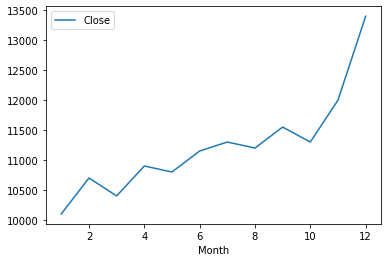

In [89]:
df_g = df_a[['Close']]
df_g.plot()

In [90]:
df_r = df_a.reset_index()
df_a = df_r.set_index('index')
df_a.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018,2018-06


In [91]:
df_sorted = df_a.sort_index(ascending=False)
df_sorted.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,8,11200,11350,11750,11200,133002,2018,2018-06


In [92]:
df_value = df_a.sort_values(by = 'Volume',ascending=False)
df_value.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,,
2019-11-01 00:00:00+09:00,11,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,9,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,12,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,10,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,2018-06


In [100]:
# Period 배열
pr_m = pd.period_range(start = '2019-01-01',
                    end = None,
                    periods = 3,
                    freq = 'M') # 월
print(pr_m)
pr_h = pd.period_range(start = '2019-01-01',
                    end = None,
                    periods = 3,
                    freq = 'H') # 시간
print(pr_h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')
PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


python, numpy, pandas 날짜 타입 비교 및 정리
https://ellun.tistory.com/320

In [102]:
# timestamp -> str 변환
import time
today = time.time()
print(today,type(today))
s = str(today)
print(s,type(s))

1642396415.0937002 <class 'float'>
1642396415.0937002 <class 'str'>


In [122]:
# datetime -> str
from datetime import datetime
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s, type(s))

2022-01-17 14:22:18 <class 'str'>


In [125]:
# str -> timestamp
from datetime import datetime
import time
s = '2022-01-17 14:14:14'
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
# datetime.strptime(s,'%Y-%m-%d %H:%M:%S') 이 부분이 str을 datetime으로 바꾼 것
print(ts,type(ts))

1642396454.0 <class 'float'>


In [9]:
# str -> datetime
from datetime import datetime
import time
s = '2022-01-17 14:14:14'
ts = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(ts,type(ts))

2022-01-17 14:14:14 <class 'datetime.datetime'>


In [120]:
# datetime -> timestamp
print(datetime.now(),type(datetime.now()))
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

2022-01-17 14:21:41.722931 <class 'datetime.datetime'>
1642396901.0 <class 'float'>


In [16]:
# [과제]
# Q. str -> datetime
# Q. datetime -> str -> timestamp
# Q. timpestamp -> str -> datetime
s = '2022-01-17 14:14:14'
date_time = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(date_time,type(date_time))

str_time = date_time.strftime('%Y-%m-%d %H:%M:%S')
time_stamp = time.mktime(datetime.strptime(str_time,'%Y-%m-%d %H:%M:%S').timetuple())
print(time_stamp,type(time_stamp))

str_time_2 = str(datetime.fromtimestamp(time_stamp))
date_time_2 = datetime.strptime(str_time_2,'%Y-%m-%d %H:%M:%S')
print(date_time_2,type(date_time_2))

2022-01-17 14:14:14 <class 'datetime.datetime'>
1642396454.0 <class 'float'>
2022-01-17 14:14:14 <class 'datetime.datetime'>


In [134]:
# 1년전 datetime 값
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days = -365)
print(delta_datetime)
print(datetime_now + delta_datetime)

-365 days, 0:00:00
2021-01-17 14:40:36.513883


In [137]:
# 두 날짜간의 일수 구하기
from datetime import datetime
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [148]:
# 특정 요일 구하기
import datetime
def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()]
get_yoil(2022,1,17)

'MON'

In [152]:
# 판다스 이용
t = pd.Timestamp(1533933365,unit = 's',tz='US/Pacific')
print(t,type(t))

2018-08-10 13:36:05-07:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [153]:
today = time.time()
today

1642399739.775811

In [154]:
date = pd.Timestamp(1642399739.775811, unit = 's', tz='Asia/Seoul')
print(date, type(date))

2022-01-17 15:08:59.775810957+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [156]:
pd.to_datetime([1,2,3], unit = 'D', origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [161]:
pr_m = pd.period_range(start='2019-01-01',end=None,periods=3,freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [163]:
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01',periods=10,freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')
df = pd.concat([sr0,sr1,sr2],axis=1)
df

,date,price,profit
0,2021-01-01,1172,84.93
1,2021-01-02,1589,25.59
2,2021-01-03,1017,67.40
3,2021-01-04,1640,53.72
4,2021-01-05,1266,86.95
5,2021-01-06,1567,46.67
6,2021-01-07,1064,52.59
7,2021-01-08,1827,99.56
8,2021-01-09,1054,9.80
9,2021-01-10,1811,53.66


In [168]:
import pandas as pd
df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [175]:
# datetime64 자료형으로 변환한 후 년, 월, 일로 분리하고 year 인덱스로 셋팅하여 출력
import pandas as pd
df = pd.read_csv('./dataset/주가데이터.csv')
df.head()
new_df = df.copy()
new_df['DateTime'] = pd.to_datetime(new_df.연월일)
new_df['year'] = new_df.DateTime.dt.year
new_df['month'] = new_df.DateTime.dt.month
new_df['day'] = new_df.DateTime.dt.day
new_df = new_df.drop(['연월일'],axis=1)
new_df.set_index('year',inplace=True)
new_df.head()

,당일종가,전일종가,시가,고가,저가,거래량,DateTime,month,day
year,,,,,,,,,
2018,10100,600,10850,10900,10000,137977,2018-07-02,7,2
2018,10700,300,10550,10900,9990,170253,2018-06-29,6,29
2018,10400,500,10900,10950,10150,155769,2018-06-28,6,28
2018,10900,100,10800,11050,10500,133548,2018-06-27,6,27
2018,10800,350,10900,11000,10700,63039,2018-06-26,6,26


In [1]:
# Q. 주가데이터를 데이터프레임으로 불러와서 datetime64자료형으로 변환한 후에
# period로 변환하고 년월일 표기 변경하여 년월을 인덱스로 셋팅하여 출력
import pandas as pd
df = pd.read_csv('./dataset/주가데이터.csv')
df.head()
new_df = df.copy()
new_df['DateTime'] = pd.to_datetime(new_df.연월일)
new_df = new_df.drop(['연월일'],axis=1)
new_df['DateTime'] = new_df.DateTime.dt.to_period(freq='M')
new_df.set_index('DateTime',inplace=True)
new_df.head()

,당일종가,전일종가,시가,고가,저가,거래량
DateTime,,,,,,
2018-07,10100,600,10850,10900,10000,137977
2018-06,10700,300,10550,10900,9990,170253
2018-06,10400,500,10900,10950,10150,155769
2018-06,10900,100,10800,11050,10500,133548
2018-06,10800,350,10900,11000,10700,63039


In [2]:
df = pd.read_csv('./dataset/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을
# 소수점 아래 둘째 자리까지 출력하세요
# mpg > kpl 근삿값 결과를 얻으려면 연비 값을 2.352(으)로 나눕니다.
new_df = df.copy()
new_df['kpl'] = (new_df.mpg * 1.60934/3.785411784)
new_df.head(3).round(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.4
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.7


In [4]:
# [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요
# (자료형 타입이 문자로 되어 있는 이유 및 float 처리)
new_df = df.copy()
new_df['kpl'] = (new_df.mpg * 1.60934/3.785411784)
for i in new_df.horsepower:         # 뭐때문에 int로 변경 안되는지, 몇개나 있는지 확인
    try: float(i)
    except: print(f'{i}',f'{new_df.horsepower[new_df.horsepower == i].count()}') ; break

? 6


In [5]:
# 창효씨 답
df1 = df.copy()
sr1 = pd.to_numeric(df1.horsepower, errors = 'coerce')
df1['horsepower'] = sr1
df1


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [6]:
# [과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN 값의 개수를 NAN값 처리 전 후로 비교하세요.
import numpy as np
new_df.horsepower[new_df.horsepower == '?'] = np.nan # NAN 으로 값 변경
new_df.horsepower = new_df.horsepower.astype('float') # float로 type 변경
new_df.info()
print(f'처리 전의 NAN 개수: {df.horsepower[df.horsepower.isnull() == True].shape[0]}')
print(f'처리 후의 NAN 개수: {new_df.horsepower[new_df.horsepower.isnull() == True].shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 31.2+ KB
처리 전의 NAN 개수: 0
처리 후의 NAN 개수: 6


C:\Users\admin\AppData\Local\Temp/ipykernel_10836/499225573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.horsepower[new_df.horsepower == '?'] = np.nan # NAN 으로 값 변경


In [7]:
# [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요.
new_df.to_pickle('./dataset/auto_df.pkl')
auto_df = pd.read_pickle('./dataset/auto_df.pkl')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.652568
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.377140
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.652568
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.802282
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.227425


In [8]:
# [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.
new_auto_df = auto_df.copy()
new_auto_df['horsepower_M'] = new_auto_df.horsepower / abs(new_auto_df.horsepower.max())
new_auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,horsepower_M
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.652568,0.565217
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.377140,0.717391
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.652568,0.652174
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.802282,0.652174
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.227425,0.608696


In [9]:
# [과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장하세요
new_auto_df['horsepower_mM'] = (new_auto_df.horsepower - new_auto_df.horsepower.min()) / (new_auto_df.horsepower.max() - new_auto_df.horsepower.min())
new_auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl,horsepower_M,horsepower_mM
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.652568,0.565217,0.456522
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.377140,0.717391,0.646739
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.652568,0.652174,0.565217
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.802282,0.652174,0.565217
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.227425,0.608696,0.510870


In [10]:
# [과제] origin 열의 고유값을 출력
new_auto_df.origin.unique()

array([1, 3, 2], dtype=int64)

In [11]:
# [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력 (1:'USA',2:'EU,3:'JAPAN')
def country(value):
    country_dic = {1:'USA',2:'EU',3:'JAPAN'}
    return country_dic[value]
new_auto_df.origin = new_auto_df.origin.apply(country)
new_auto_df.origin.unique()

array(['USA', 'JAPAN', 'EU'], dtype=object)

In [12]:
new_auto_df.origin.replace({1:'USA',2:'EU',3:'JAPAN'},inplace=True)
new_auto_df.origin.unique()

array(['USA', 'JAPAN', 'EU'], dtype=object)

In [13]:
# [과제] origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력
print(new_auto_df.origin.dtype)
print()
new_auto_df.origin = new_auto_df.origin.astype('category')
new_auto_df.origin

object



0      USA
1      USA
2      USA
3      USA
4      USA
      ... 
393    USA
394     EU
395    USA
396    USA
397    USA
Name: origin, Length: 398, dtype: category
Categories (3, object): ['EU', 'JAPAN', 'USA']

In [14]:
# [과제] origin열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.
new_auto_df.origin = new_auto_df.origin.astype('str')
print(new_auto_df.origin.dtype)
print()
print(new_auto_df.origin)

object

0      USA
1      USA
2      USA
3      USA
4      USA
      ... 
393    USA
394     EU
395    USA
396    USA
397    USA
Name: origin, Length: 398, dtype: object


In [15]:
new_auto_df.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [16]:
# [과제] horsepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
# np.histogram() 함수로 3개의 bin으로 나눔
import numpy as np
count,bin_dividers = np.histogram(new_auto_df.horsepower,
                bins=3,
                range=[new_auto_df.horsepower.min(),new_auto_df.horsepower.max()], # 위에서 NAN 안버림
                normed=None,
                weights=None,
                density=None)
print(bin_dividers)
bin_names = ['저출력','보통출력','고출력']
new_df['hp_bin'] = pd.cut(x=new_auto_df.horsepower, # 데이터 배열
                    bins=bin_dividers, # 경계값 리스트
                    labels=bin_names, # bin 이름
                    include_lowest=True) # 첫 경계값 포함
new_df[['horsepower','hp_bin']].head()

[ 46.         107.33333333 168.66666667 230.        ]


0      보통출력
1      보통출력
2      보통출력
3      보통출력
4      보통출력
       ... 
393     저출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: horsepower, Length: 398, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [21]:
new_auto_df.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [18]:
# [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요
new_auto_df.horsepower_M.describe()

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower_M, dtype: float64

In [19]:
new_auto_df.horsepower_mM.describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower_mM, dtype: float64

In [59]:
new_auto_df.horsepower[new_auto_df.horsepower.isnull()]

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
374   NaN
Name: horsepower, dtype: float64